# **Reconhecimento de texto em imagens com Python e Tesseract OCR**

In [0]:
# Codigo para montar o Drive Google e acessar as minhas imagens.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


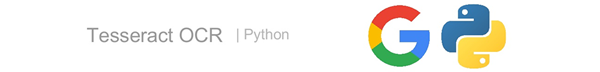

In [0]:
# Biblioteca só tem a finalidade de exibir as imagens e Gifs no notebook.
from IPython.core.display import Image, HTML
Image(filename=('/content/drive/My Drive/Python-Tesseract-OCR/img-ocr/600x72.png'))

Nós, os seres humanos, podemos entender o conteúdo de uma imagem simplesmente olhando para ela. Percebemos o conteúdo de imagem e, automaticamente, sabemos se é possível ler o texto. Ou seja, é uma capacidade quase que involuntária – Olhar, ver a imagem, ler o texto (separando o que é texto e/ou figuras) e processar o conteúdo. Contudo, os computadores não funcionam da mesma maneira. Eles precisam de algo mais “concreto” e organizado de uma maneira que possam entender o conteúdo de uma imagem digital.

Mas o que é uma imagem um computador?

Segundo Gonzalez, R. and Woods, R. (1992), uma imagem pode ser definida como uma função f(x, y), onde o valor nas coordenadas espaciais x e y corresponde ao brilho (intensidade) da imagem nessa coordenada.

A única forma de se representar uma imagem em um computador é quando ela está digitalizada tanto no domínio espacial como no das amplitudes. 

Uma imagem digital é a representação numérica e discreta de um objeto, ou especificamente, é uma função quantificada e amostrada, de duas dimensões, geradas por meios ópticos, disposta em um grade padrão, retangular igualmente espaçada, quantificada em iguais intervalos de amplitude. Assim, uma imagem digital é um vetor retangular bidimensional de amostras de valores quantificados (Cordeiro (2002), Castleman (1996)).

Em outras palavras, uma imagem digital é (basicamente) um conjunto de três canais de cor. Também conhecidos como [***RGB***](https://pt.wikipedia.org/wiki/RGB) (RED – GREEN – BLUE). O RGB pode variar seus valores internos entre 0 e 255. Assim, a “mistura” dos elementos gera uma imagem digital. Vale lembrar que, as menores unidades de uma imagem digital são denominadas Picture Element (Pixel). Um pixel é a representação numérica da luminosidade de um ponto da imagem.

Bem, agora sabemos o que é uma imagem digital, não é mesmo?!

É nesse momento que entra o ***OCR*** - *“Optical Character Recognition”* (Tradução Livre: Reconhecimento Óptico de Caracteres). Na prática, essa tecnologia faz a leitura de um arquivo em imagem para identificar padrões e/ou transcrever textos que estão contidos em placas, publicidade, livros e/ou documentos manuscritos que devem ser convertidos em cópia digital. Embora nem sempre seja perfeito, é muito conveniente e torna muito mais fácil e rápido para algumas pessoas realizarem seu trabalho.

# **Aplicação na vida real**

Um exemplo muito comum de aplicação do OCR, mas que, ao mesmo tempo causa enorme dor de cabeça para condutores, são os radares de trânsito. Eles possuem câmeras de alta sensibilidade que captura uma foto da placa do carro que está irregular e envia para um sistema que utilizará o OCR para extrair os números e letras da imagem que foi recebida.

In [0]:
Image(url="https://media1.tenor.com/images/d7b8afdded86064c3d946a3dc3950d70/tenor.gif")

Neste texto, para ilustrar o a funcionalidade das aplicações OCR, irei demonstrar o reconhecimento óptico de caracteres usando o ***Tesseract OCR***.

Originalmente, o Tesseract foi desenvolvido na Hewlett-Packard Laboratories Bristol e na Hewlett-Packard Co, Greeley Colorado (1985 à 1994). Depois de algumas mudanças, foi portado para Windows em 1996, além de alguns upgrades em 1998. Contudo, só em 2005 o Tesseract foi liberado para a comunidade pela HP. Assim, desde 2006 é desenvolvido/mantido pela [***Google***](https://opensource.google/projects/tesseract).

Texto original em: https://github.com/tesseract-ocr/tesseract


# **O que usaremos?**

Para este projeto de OCR, precisamos do Tesseract OCR. O processo de instalação se encontra no link: https://github.com/tesseract-ocr/tesseract/wiki

Instalações no Windows, o executável pode ser baixado no link: https://github.com/UB-Mannheim/tesseract/wiki


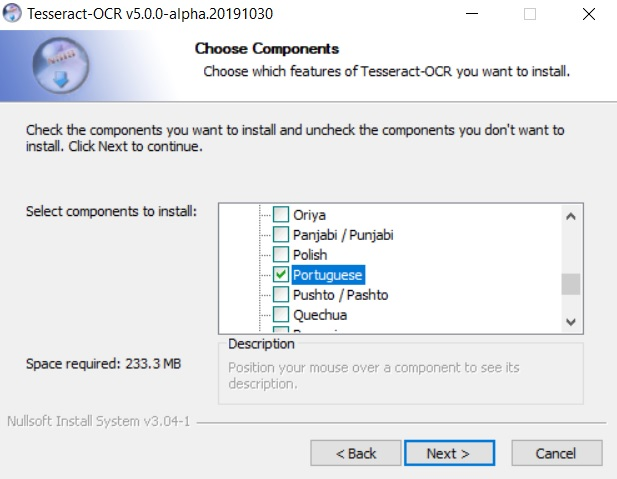

In [0]:
Image(filename=('/content/drive/My Drive/Python-Tesseract-OCR/img-ocr/OCR.jpg'))

É muito importante incluir na instalação o suporte à linguagem “portuguese”.

Usaremos, também, a biblioteca ***Python Tesseract***, ou simplesmente ***PyTesseract***, que é um “cápsula” (invólucro) do mecanismo Tesseract-OCR do Google. Como o código é aberto, a escolha é bem óbvia. 


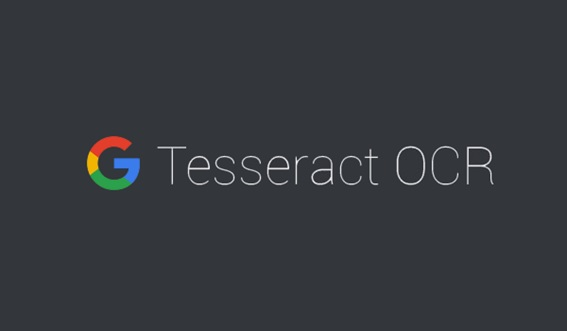

In [0]:
Image(filename=('/content/drive/My Drive/Python-Tesseract-OCR/img-ocr/GtesseractOCR.jpg'))

Também usaremos o virtualenv, pois ele lida com a configuração do ambiente virtual. Ou seja, vamos isolar nossa aplicação em um ambiente virtual dedicado ao projeto. Em caso de dúvidas, como o foco dessa aplicação não é entrar em detalhes sobre o ambiente virtual, recomendo o post: https://pythonacademy.com.br/blog/python-e-virtualenv-como-programar-em-ambientes-virtuais

A biblioteca [***Pillow***](https://pypi.org/project/Pillow/), que é um *“fork”* (bifurcação) da PIL (Python Imaging Library) para lidar com a abertura e manipulação de imagens em muitos formatos no Python, também, será utilizada.


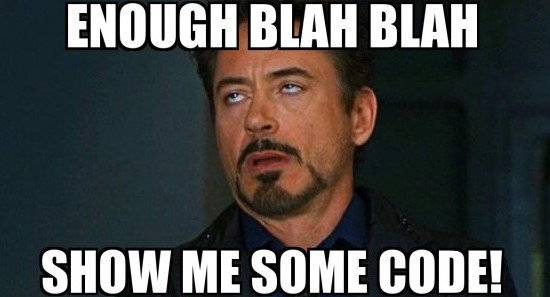

In [0]:
Image(filename=('/content/drive/My Drive/Python-Tesseract-OCR/img-ocr/enough-blah-blah.jpg'))

# ***Show Me!!!***

Para esta aplicação OCR simples, vou utilizar o PyCharm (questão de gosto mesmo). Com seu diretório selecionado, crie um arquivo ***.py*** e vamos chamar de extraindo-texto-de-imagem.py (você escolhe o nome que desejar). No mesmo diretório que o arquivo ***.py*** coloque uma imagem. No meu caso, vou usar a imagem abaixo.

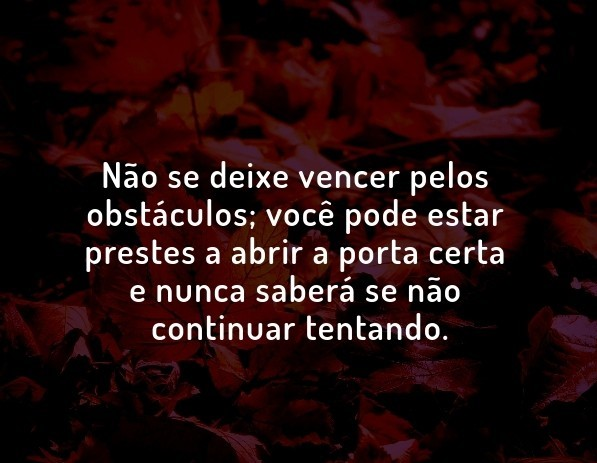

In [0]:
Image(filename=('/content/drive/My Drive/Python-Tesseract-OCR/img-ocr/vaidarcerto.jpg'))

No seu terminal (ou CMD no Windows), você pode criar um ambiente virtual e começar a importação das bibliotecas. Como, no momento, estou usando uma versão do Windows, o código pode ser um pouquinho diferente. Assim sendo, recomendo o link acima sobre os [*ambientes virtuais*](https://pythonacademy.com.br/blog/python-e-virtualenv-como-programar-em-ambientes-virtuais).

**Implementação**

Com a instalação concluída e bibliotecas instaladas, agora podemos criar uma função simples que obtém uma imagem e retorna o texto detectado na imagem - este será o núcleo do nosso projeto:

In [0]:
# A instalação do tesseract aqui foi necessária para rodar a aplicação no
# Google Colaboratory.
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (27.1 MB/s)
debconf: unable to initial

In [0]:
# Instalação de bibliotecas no Google Colaboratory.
!pip install Pillow
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.0-py2.py3-none-any.whl size=20970 sha256=11f21837b1fde4a1b3c015c9ce090c1e12240cff95b5439c4351ed137db656ea
  Stored in directory: /root/.cache/pip/wheels/78/c9/ac/4cb76bd547f9970070522439e5203ba7926c5c5c4f131583ea
Successfully built pytesseract


In [0]:
# Importando as bibliotecas instaladas.
from PIL import Image
import pytesseract

Nós importamos *“Image”* da biblioteca **Pillow** e da nossa biblioteca **PyTesseract**.

In [0]:
# Indicando caminho.
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

Foi necessário indicar o caminho para o Google Colaboratory.

In [0]:
# Apenas verificando se está tudo "OK".
pytesseract.image_to_string

<function pytesseract.pytesseract.image_to_string>

In [0]:
def img_core_file(imgfile):
    """
    A função manipulará o processamento principal de imagens OCR.
    """
    text_extracao = pytesseract.image_to_string(Image.open(imgfile))
    # Usaremos a classe Image do Pillow para abrir a imagem e
    # o pytesseract para detectar a string na imagem
    # É muito IMPORTANTE que o valor “lang” esteja em português, pq o valor
    # padrão é inglês. Logo, afeta no resultado de saída do texto.

    return text_extracao

Em seguida, criamos uma função *“img_core_file”* que recebe um nome de arquivo e retorna o texto contido na imagem. 

***Image.open()*** recebe uma string indicando um caminho válido de uma imagem (quando não especificado o diretório, a busca ocorrerá na raiz do seu arquivo de script) e retorna uma referência a um objeto em memória do tipo **PIL.Image**.

***Pytesseract.image_to_string()*** recebe o parâmetro obrigatório *“image”*, e o opcional *“lang”*, isto informa ao tesseract que o alfabeto que ele está tentando reconhecer é o português (suportando acentos e cedilha), caso não especificado seu padrão é ‘*eng’*, inglês.

Atribuído o retorno do texto reconhecido para a variável *“text_extracao”*.

In [0]:
# Não esquecer de adicionar a imagem no drive - Se tiver usando o Google
# Colaboratory.

print(img_core_file('vaidarcerto.jpg'))

Nao se deixe vencer pelos
obstaculos; vocé pode estar
prestes a abrir a porta certa

e nunca sabera se nao
continuar tentando.


Assim, o valor é extraído é o retorno da função. Com isso, na última linha estamos invocando um *print()*, chamando a função dentro dele e passando a imagem que desejamos extrair o texto.

Ao executarmos obtemos o texto que estava na imagem e ele é editável:

***“Não se deixe vencer pelos obstáculos; você pode estar prestes a abrir a porta certa e nunca saberá se não continuar tentando.”***

Trecho de código, somos recebidos com isso:

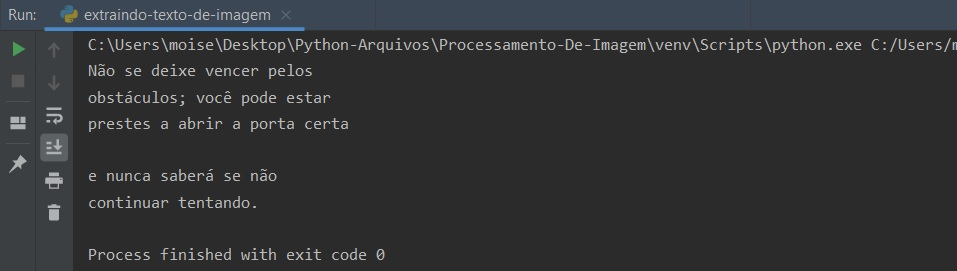

In [0]:
Image(filename=('/content/drive/My Drive/Python-Tesseract-OCR/img-ocr/saida.jpg'))

# **Dessa vez com um texto em Inglês**

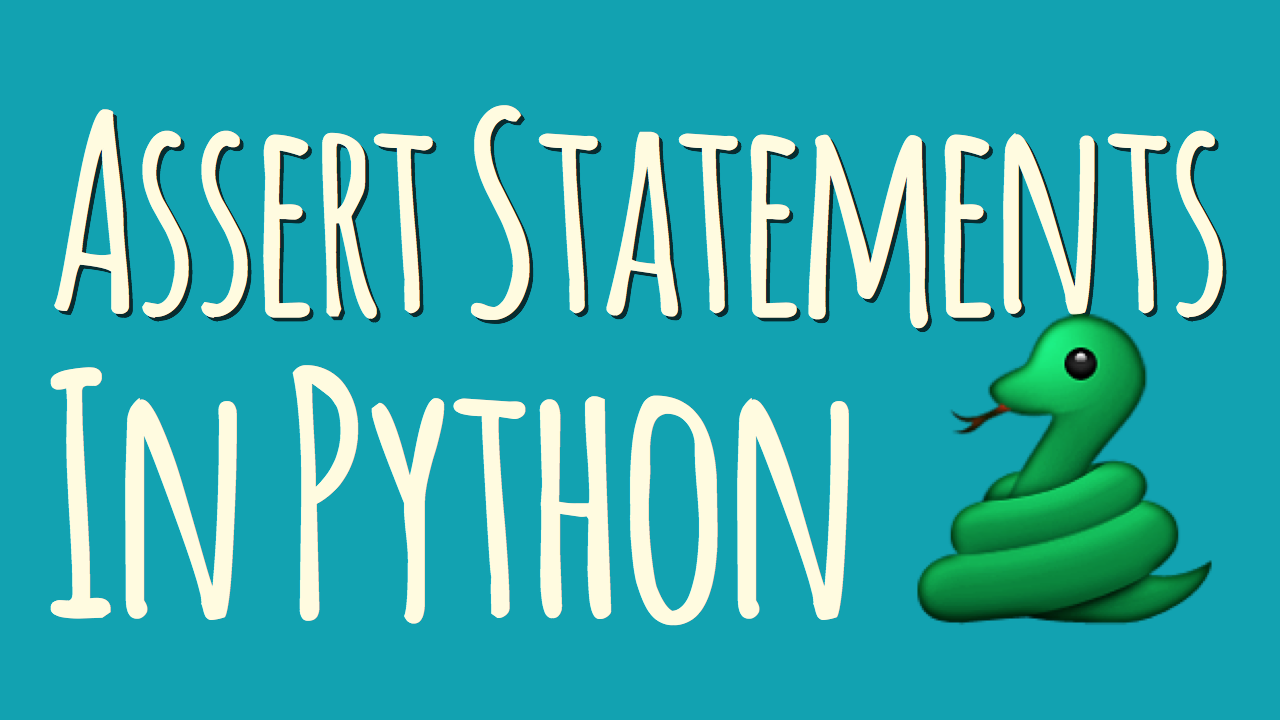

In [0]:
Image(filename=('/content/drive/My Drive/Python-Tesseract-OCR/img-ocr/python-assert.png'))

In [0]:
print(img_core_file('python-assert.png'))

ASSERT STATEMENTS
IN PYTHON


In [0]:
Image(url="https://media.giphy.com/media/12NUbkX6p4xOO4/giphy.gif")

In [0]:
# Para implementações curtas e rápidas, a extração de texto
# pode ser feita com apenas 3 linhas.
# São elas:

from PIL import Image
import pytesseract
print(pytesseract.image_to_string(Image.open('python-assert.png')))

ASSERT STATEMENTS
IN PYTHON


# **Os problems... São os problems**

Como o Tesseract não é "bala de prata" (não resolve tudo e em todos os casos) é evidência de que o OCR nem sempre é 100%. Logo, é necessário/preciso de intervenção humana de tempos em tempos.

Existe de possíveis problemas nesta [***wiki***](https://github.com/tesseract-ocr/tesseract/wiki/ImproveQuality). Várias etapas podem ser feitas para melhorar a fidelidade da ***Engine***, tais como: 

Redimensionamento, binarização, redução de ruídos, rotação/alinhamento das linhas e remoção das bordas. Nos casos mais simples, a resolução pode ser via retirada de bordas descartando a parte excedente do texto antes enviar ao pytesseract.

Segundo o *wiki* acima, uma imagem elegível para uma extração mais fiel pelo tesseract-OCR deve possuir as seguintes recomendações:
<br />
<br />

* Dois canais de cores somente (preto e branco). Seja ela em escala de cinza (0≤ Vi≤ 255) ou então a imagem binarizada (Vi== 0 || Vi== 255). Vi=Valor de intensidade.
<br />
<br />
* Texto alinhado/padronizado e sem ruídos (gerados geralmente durante a etapa de binarização).
<br />
<br />
* Altura do box (espaço ocupado pelos caracteres) superior ao mínimo de 10px.
Densidade ideal de 300dpi, ou proporcionais para o pressuposto acima.
Possuir o texto extraível em um único padrão de alfabeto (ou idioma).
Sem espaço inútil, considerado como bordas para o texto.

<br />
<br />

**Still having problems?**

Se você tentou, mas ainda está obtendo resultados de baixa precisão, peça ajuda no [***fórum***](https://groups.google.com/forum/?fromgroups#!forum/tesseract-ocr), postando sua imagem que deseja extrair conteúdo.

# **Por fim...**

Nesta aplicação, nós nos concentramos na biblioteca **PyTesseract**. Contudo, existem outras *Libs* Python que podem ajudar na extração de textos de imagens. Por exemplo:

[***Textract***](https://pypi.org/project/textract/): Pode extrair dados de PDF’s.

[***Pyocr***](https://gitlab.gnome.org/World/OpenPaperwork/pyocr): Oferece mais opções de detecção, como frases, dígitos ou palavras.

# **Autores Citados**

* Gonzalez and Woods (1992) GONZALES, R. C. WOODS, R. E. Digital Image Processing. University of Tennessee Perceptics Corporation, 1992.

* Cordeiro (2002) Cordeiro, F. M. Reconhecimento e Classificação de Padrões de Imagens de Núcleos Linfócitos do Sangue Periférico Humano coma Utilização de Redes Neurais Artificiais. Universidade Federal deSanta Catarina, 2002.

* Castleman (1996) Castleman, Kenneth R. Digital Image Processing. Upper Saddler River: Prentice Hall, Inc. 1996.